In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import sklearn

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')

print(train.head())
print(test.head())
print(sample_submission.head())

   id     BertzCT       Chi1     Chi1n      Chi1v     Chi2n      Chi2v  \
0   0  323.390782   9.879918  5.875576   5.875576  4.304757   4.304757   
1   1  273.723798   7.259037  4.441467   5.834958  3.285046   4.485235   
2   2  521.643822  10.911303  8.527859  11.050864  6.665291   9.519706   
3   3  567.431166  12.453343  7.089119  12.833709  6.478023  10.978151   
4   4  112.770735   4.414719  2.866236   2.866236  1.875634   1.875634   

      Chi3v     Chi4n  EState_VSA1  ...  SlogP_VSA3  VSA_EState9  fr_COO  \
0  2.754513  1.749203     0.000000  ...    4.794537    35.527357       0   
1  2.201375  1.289775    45.135471  ...   13.825658    44.707310       0   
2  5.824822  1.770579    15.645394  ...   17.964475    45.660120       0   
3  7.914542  3.067181    95.639554  ...   31.961948    87.509997       0   
4  1.036450  0.727664    17.980451  ...    9.589074    33.333333       2   

   fr_COO2  EC1  EC2  EC3  EC4  EC5  EC6  
0        0    1    1    0    0    0    0  
1        0  

In [5]:
train.describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,7418.500000,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,...,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,4283.505982,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,...,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3709.250000,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,...,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7418.500000,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,...,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,11127.750000,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,...,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,14837.000000,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,...,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
test.describe()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
count,9893.00000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,...,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000,9893.000000
mean,19784.00000,516.411916,9.106998,5.848047,6.733659,4.428979,5.247994,3.401083,1.750078,28.956335,...,18.493154,8.917260,11.222822,6.789234,15.810550,30.919849,13.601593,49.426755,0.459719,0.461235
std,2856.00744,544.327795,6.754583,4.641662,5.863886,3.770031,4.939702,3.431766,1.837159,31.470865,...,35.832279,19.358857,20.015732,10.778071,18.265549,33.532665,14.689893,29.542758,0.676657,0.677194
min,14838.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.061146,0.000000,0.000000
25%,17311.00000,150.255712,4.698377,2.846050,2.934030,1.949719,2.049137,1.171060,0.508512,5.969305,...,0.000000,0.000000,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000
50%,19784.00000,289.901774,6.447265,4.009996,4.337841,2.930013,3.168052,1.923982,1.058931,17.282269,...,5.969305,0.000000,5.563451,0.000000,11.752550,19.765380,9.589074,41.666667,0.000000,0.000000
75%,22257.00000,652.758463,10.966946,7.490880,8.528316,5.788793,6.516914,4.302610,2.509394,44.876559,...,17.907916,12.132734,13.344559,6.923737,17.744066,42.727765,14.383612,56.083333,1.000000,1.000000
max,24730.00000,3919.541449,53.876516,43.283925,53.990574,36.368883,44.726398,26.736931,15.620667,363.705954,...,482.434223,258.844527,271.424271,96.917997,79.920667,492.729739,115.406157,384.450519,8.000000,8.000000


In [7]:
sample_submission.describe()

,id,EC1,EC2
count,9893.00000,9893.0,9893.0
mean,19784.00000,0.5,0.5
std,2856.00744,0.0,0.0
min,14838.00000,0.5,0.5
25%,17311.00000,0.5,0.5
50%,19784.00000,0.5,0.5
75%,22257.00000,0.5,0.5
max,24730.00000,0.5,0.5


In [8]:
def show_heatmap(data, subject_name, w = 17, h = 15):
    corr = data.corr()
    mask = np.zeros_like(corr, dtype = np.bool_)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(w, h))
    plt.title(f"Overall Correlation of {subject_name} Features", fontsize=18)

    sns.heatmap(corr, mask = mask, annot = False, cmap='RdYlGn', linewidths=0.2, annot_kws={'size' : 20})
    plt.show()

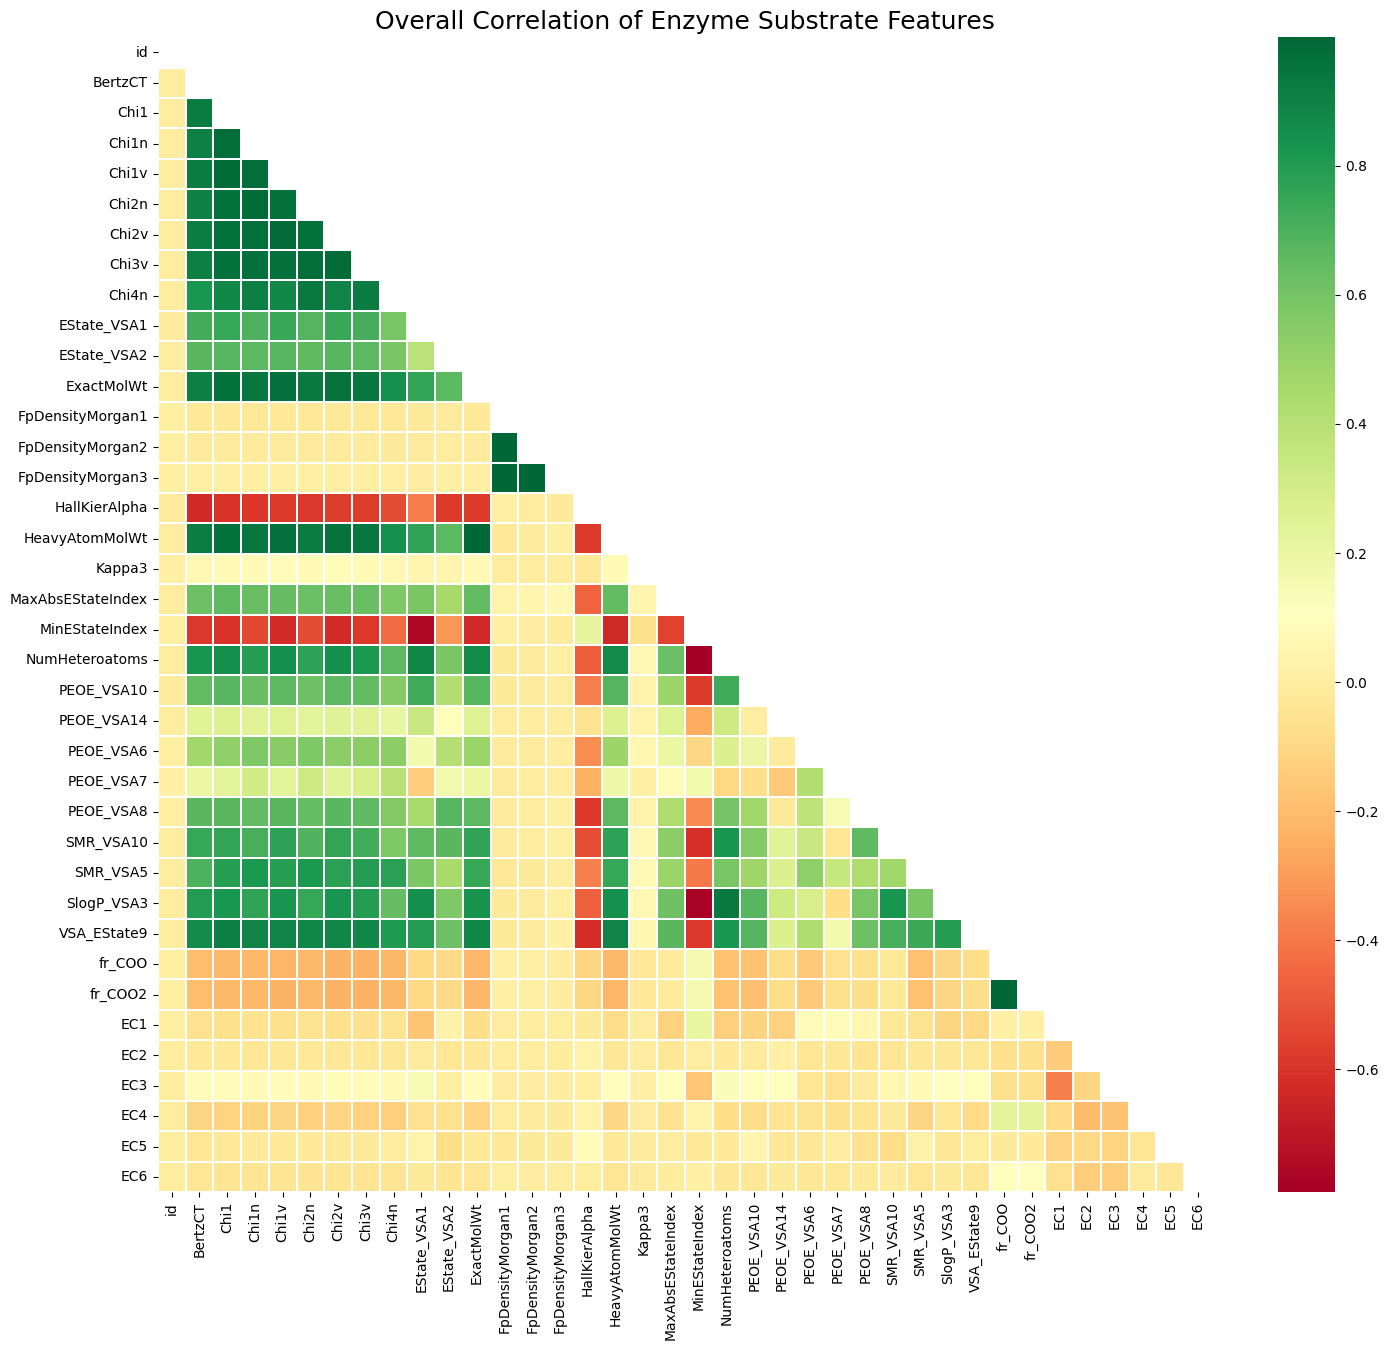

In [9]:
show_heatmap(train, 'Enzyme Substrate')

In [10]:
train = train.drop('id', axis=1)

In [11]:
# normalizing each columns' data between 0 ~ 1

scaler = MinMaxScaler()

normalized_values = scaler.fit_transform(train.values)
normalized_train = pd.DataFrame(normalized_values, columns=train.columns)
normalized_train.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.126575,0.131345,0.116679,0.126114,0.137677,0.151918,0.149415,0.110340,0.080292,0.104420,...,0.118165,0.140403,0.057277,0.057403,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570
std,0.133283,0.098057,0.092618,0.109793,0.116803,0.142428,0.150178,0.116090,0.087237,0.136605,...,0.126497,0.074830,0.083493,0.083514,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036635,0.067299,0.056693,0.054889,0.060559,0.058835,0.050731,0.031351,0.016412,0.000000,...,0.041545,0.090875,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.071497,0.093245,0.080772,0.082214,0.092263,0.093778,0.085164,0.066775,0.047713,0.064249,...,0.083090,0.120799,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.160358,0.160608,0.149215,0.159602,0.179802,0.191136,0.196762,0.157675,0.123387,0.128498,...,0.129219,0.157795,0.125000,0.125000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# generate 'bertzCT_family' column to store mean of bertzCT_family columns
bertzCT_family = ['BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v', 'Chi4n', 'ExactMolWt', 'HeavyAtomMolWt', 'NumHeteroatoms', 'VSA_EState9']

normalized_train['bertzCT_family'] = normalized_train[bertzCT_family].mean(axis=1)
normalized_train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6,bertzCT_family
0,0.079458,0.142053,0.117103,0.109964,0.133707,0.124489,0.120385,0.108830,0.000000,0.119459,...,0.105052,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.111615
1,0.067255,0.104370,0.088520,0.109204,0.102035,0.129709,0.096210,0.080246,0.124099,0.000000,...,0.128598,0.00,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.115121
2,0.128169,0.156882,0.169964,0.206821,0.207026,0.275301,0.254572,0.110160,0.043017,0.066111,...,0.131042,0.00,0.00,1.0,1.0,0.0,0.0,1.0,0.0,0.183220
3,0.139419,0.179053,0.141289,0.240188,0.201210,0.317477,0.345903,0.190830,0.262958,0.000000,...,0.238382,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.244284
4,0.027708,0.063474,0.057125,0.053643,0.058258,0.054242,0.045298,0.045273,0.049437,0.128498,...,0.099425,0.25,0.25,1.0,0.0,1.0,1.0,1.0,0.0,0.058760


In [13]:
# remove BertzCTz_family
normalized_train = normalized_train.drop(bertzCT_family, axis=1)
normalized_train.head()

,EState_VSA1,EState_VSA2,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,...,SlogP_VSA3,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6,bertzCT_family
0,0.000000,0.119459,0.997282,0.997799,0.998452,0.876023,0.069425,0.762784,0.527203,0.000000,...,0.041545,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.111615
1,0.124099,0.000000,0.997528,0.998322,0.999058,0.893567,0.066351,0.699435,0.121441,0.250000,...,0.119800,0.00,0.00,0.0,1.0,1.0,0.0,0.0,0.0,0.115121
2,0.043017,0.066111,0.997139,0.997823,0.998506,0.812865,0.073671,0.718993,0.102313,0.000000,...,0.155663,0.00,0.00,1.0,1.0,0.0,0.0,1.0,0.0,0.183220
3,0.262958,0.000000,0.997254,0.997570,0.998312,0.752047,0.068530,0.714715,0.085251,0.437500,...,0.276952,0.00,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.244284
4,0.049437,0.128498,0.997675,0.998373,0.998739,0.775439,0.066802,0.630555,0.377304,0.061864,...,0.083090,0.25,0.25,1.0,0.0,1.0,1.0,1.0,0.0,0.058760


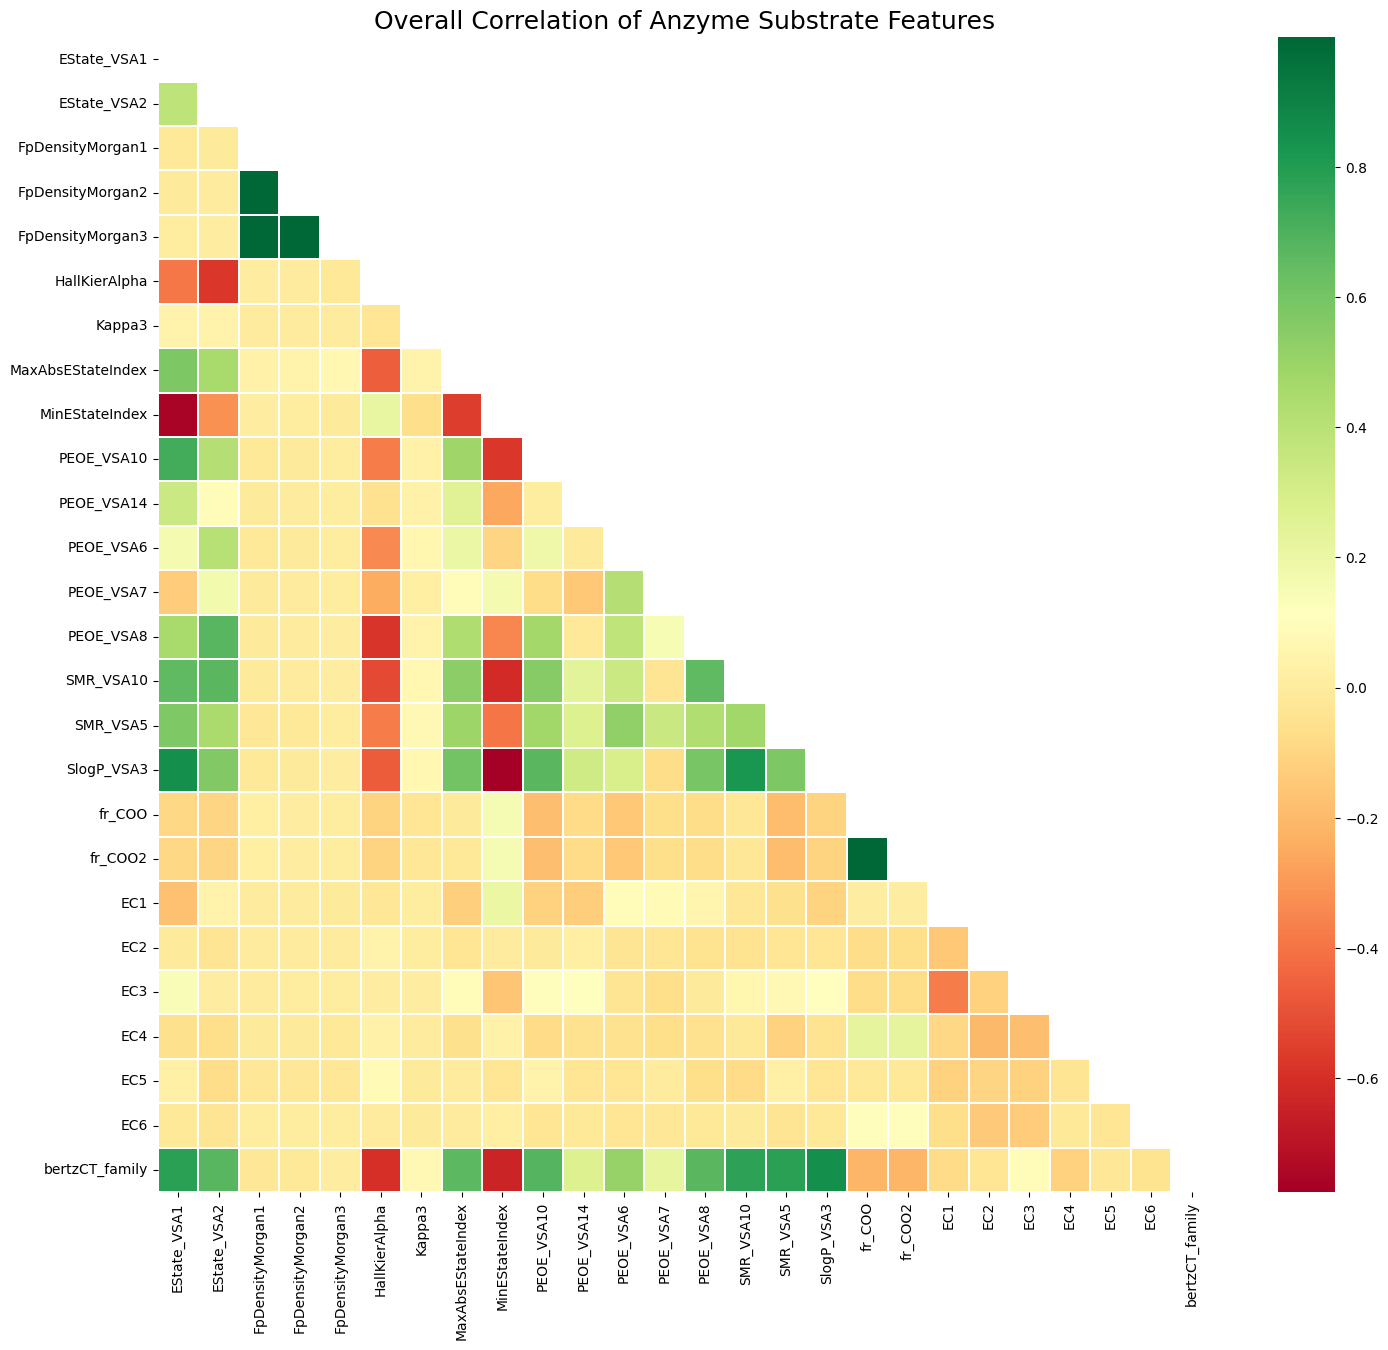

In [14]:
show_heatmap(normalized_train, 'Anzyme Substrate')

In [15]:
fpDensityMorgan_family = ['FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3']
normalized_train['fpDensityMorgan_family'] = normalized_train[fpDensityMorgan_family].mean(axis=1)

frCOO_family = ['fr_COO', 'fr_COO2']
normalized_train['frCOO_family'] = normalized_train[frCOO_family].mean(axis=1)
normalized_train.describe()

,EState_VSA1,EState_VSA2,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,...,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6,bertzCT_family,fpDensityMorgan_family,frCOO_family
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.080292,0.104420,0.997364,0.997926,0.998290,0.762833,0.068004,0.675385,0.341329,0.112853,...,0.057403,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570,0.138363,0.997860,0.057340
std,0.087237,0.136605,0.008208,0.008212,0.008218,0.109393,0.028293,0.099764,0.167626,0.142929,...,0.083514,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616,0.113013,0.008209,0.083414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003145,0.000000,0.000000
25%,0.016412,0.000000,0.997078,0.997745,0.998058,0.709942,0.065474,0.635063,0.135300,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.063447,0.997705,0.000000
50%,0.047713,0.064249,0.997384,0.998005,0.998444,0.775439,0.066388,0.666741,0.410638,0.061864,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.094121,0.997937,0.000000
75%,0.123387,0.128498,0.997758,0.998300,0.998656,0.837427,0.067988,0.738295,0.449440,0.187500,...,0.125000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.173260,0.998207,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.862469,0.999701,1.000000


In [16]:
normalized_train = normalized_train.drop(fpDensityMorgan_family, axis=1)
normalized_train = normalized_train.drop(frCOO_family, axis=1)
normalized_train.describe()

,EState_VSA1,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,...,SlogP_VSA3,EC1,EC2,EC3,EC4,EC5,EC6,bertzCT_family,fpDensityMorgan_family,frCOO_family
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.080292,0.104420,0.762833,0.068004,0.675385,0.341329,0.112853,0.036876,0.023873,0.053517,...,0.118165,0.667745,0.798962,0.313789,0.279081,0.144831,0.151570,0.138363,0.997860,0.057340
std,0.087237,0.136605,0.109393,0.028293,0.099764,0.167626,0.142929,0.071640,0.052625,0.095365,...,0.126497,0.471038,0.400790,0.464047,0.448562,0.351942,0.358616,0.113013,0.008209,0.083414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003145,0.000000,0.000000
25%,0.016412,0.000000,0.709942,0.065474,0.635063,0.135300,0.000000,0.000000,0.000000,0.000000,...,0.041545,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.063447,0.997705,0.000000
50%,0.047713,0.064249,0.775439,0.066388,0.666741,0.410638,0.061864,0.012373,0.000000,0.000000,...,0.083090,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.094121,0.997937,0.000000
75%,0.123387,0.128498,0.837427,0.067988,0.738295,0.449440,0.187500,0.032430,0.032317,0.065472,...,0.129219,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.173260,0.998207,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.862469,0.999701,1.000000


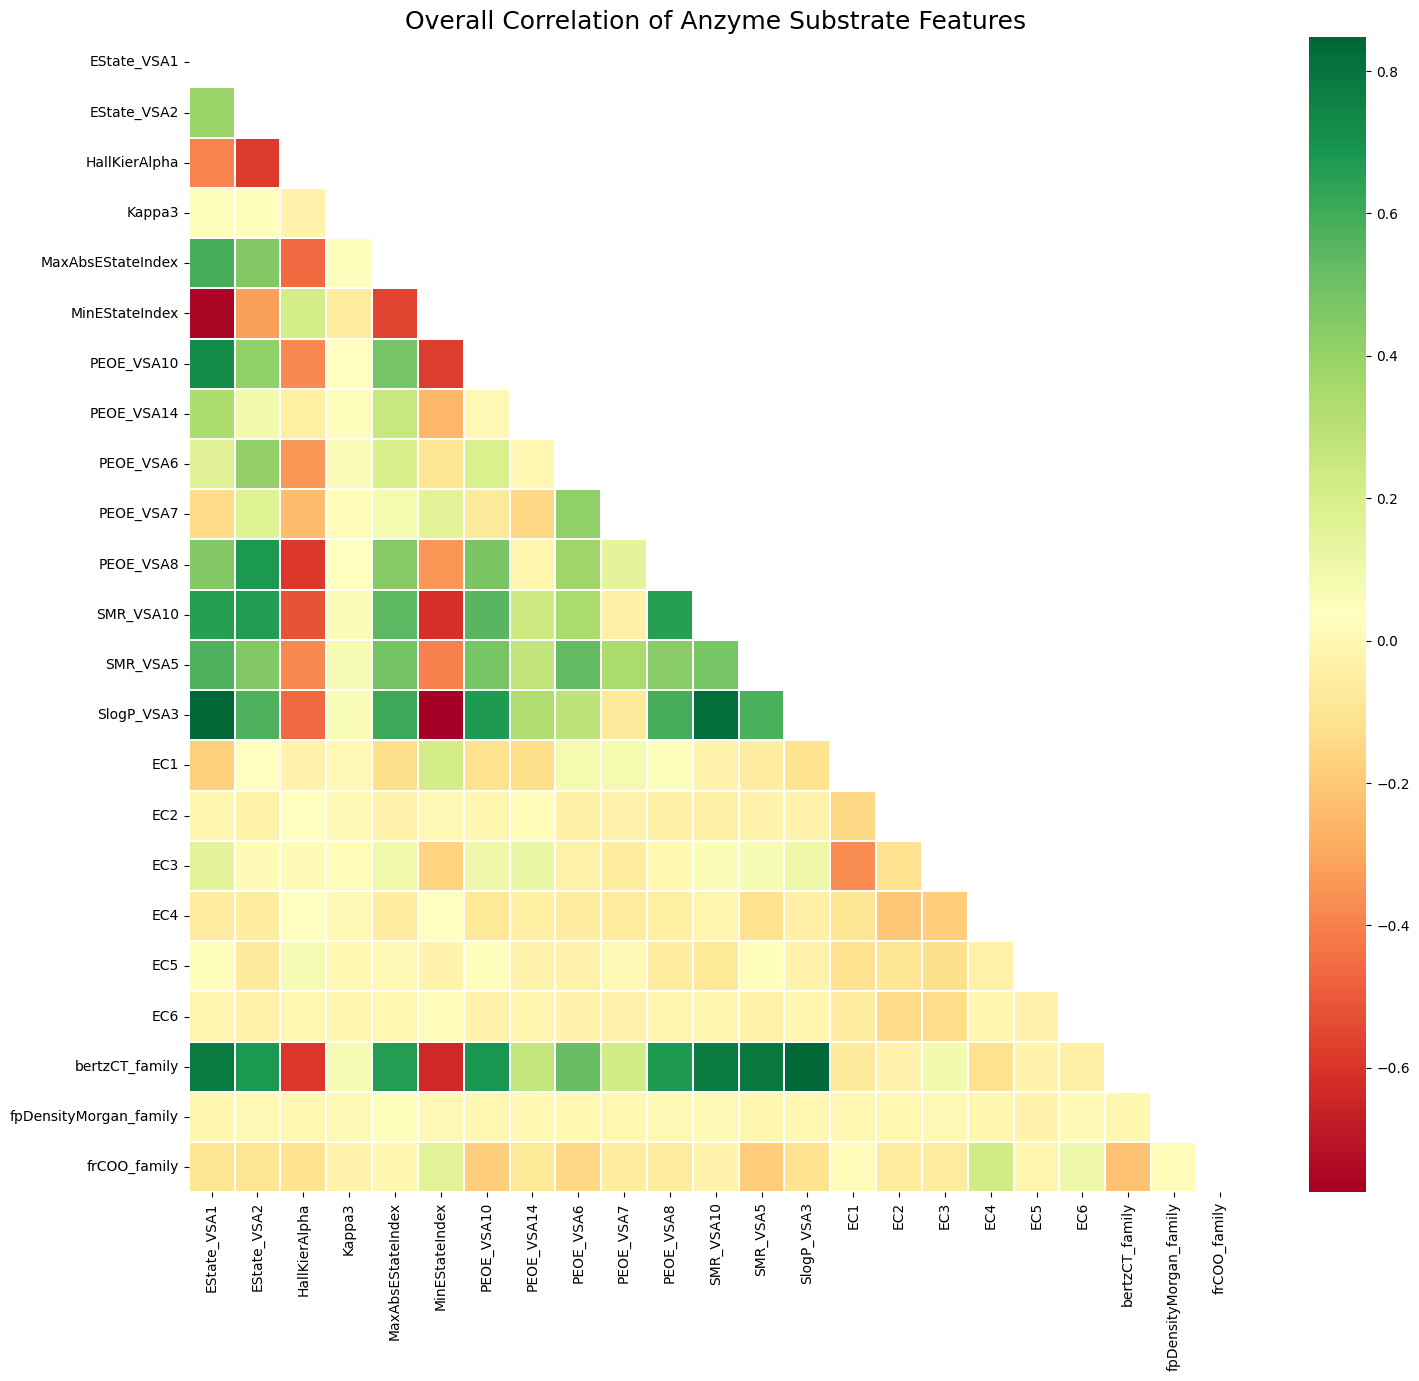

In [17]:
show_heatmap(normalized_train, 'Anzyme Substrate')

In [18]:
unused_ecs = ['EC3', 'EC4', 'EC5', 'EC6']
normalized_train = normalized_train.drop(unused_ecs, axis=1)

In [19]:
normalized_train.describe()

,EState_VSA1,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,EC1,EC2,bertzCT_family,fpDensityMorgan_family,frCOO_family
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.080292,0.104420,0.762833,0.068004,0.675385,0.341329,0.112853,0.036876,0.023873,0.053517,0.066812,0.194034,0.063050,0.118165,0.667745,0.798962,0.138363,0.997860,0.057340
std,0.087237,0.136605,0.109393,0.028293,0.099764,0.167626,0.142929,0.071640,0.052625,0.095365,0.108277,0.223925,0.068794,0.126497,0.471038,0.400790,0.113013,0.008209,0.083414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003145,0.000000,0.000000
25%,0.016412,0.000000,0.709942,0.065474,0.635063,0.135300,0.000000,0.000000,0.000000,0.000000,0.000000,0.073930,0.013031,0.041545,0.000000,1.000000,0.063447,0.997705,0.000000
50%,0.047713,0.064249,0.775439,0.066388,0.666741,0.410638,0.061864,0.012373,0.000000,0.000000,0.000000,0.145556,0.040743,0.083090,1.000000,1.000000,0.094121,0.997937,0.000000
75%,0.123387,0.128498,0.837427,0.067988,0.738295,0.449440,0.187500,0.032430,0.032317,0.065472,0.068997,0.219487,0.086716,0.129219,1.000000,1.000000,0.173260,0.998207,0.125000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.862469,0.999701,1.000000


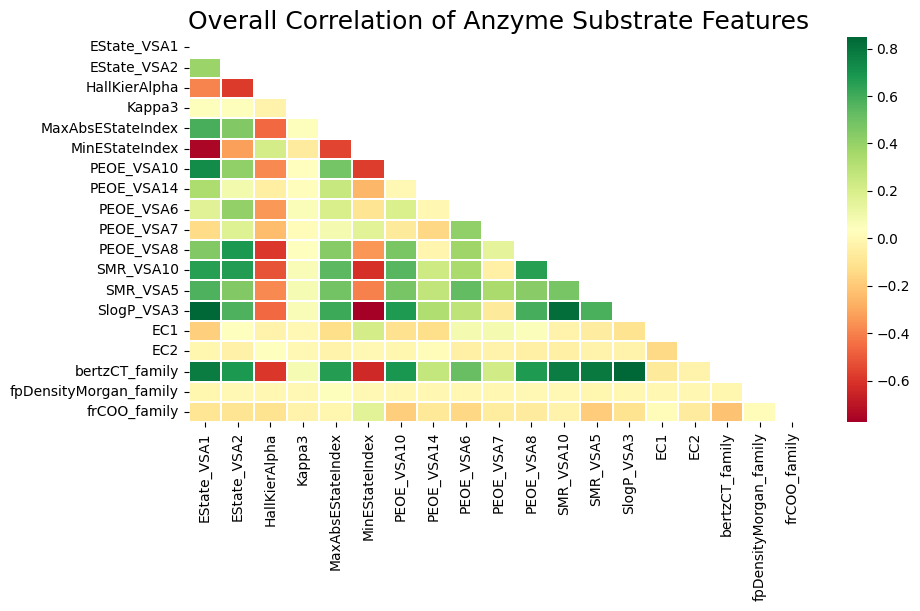

In [20]:
show_heatmap(normalized_train, 'Anzyme Substrate', 10, 5)

In [21]:
bertzCT_family_ext = ['bertzCT_family', 'EState_VSA1', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3']
normalized_train['bertzCT_family_ext'] = normalized_train[bertzCT_family_ext].mean(axis=1)

normalized_train = normalized_train.drop(bertzCT_family_ext, axis=1)
normalized_train.describe()

,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,fpDensityMorgan_family,frCOO_family,bertzCT_family_ext
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.104420,0.762833,0.068004,0.675385,0.341329,0.112853,0.036876,0.023873,0.053517,0.066812,0.667745,0.798962,0.997860,0.057340,0.118781
std,0.136605,0.109393,0.028293,0.099764,0.167626,0.142929,0.071640,0.052625,0.095365,0.108277,0.471038,0.400790,0.008209,0.083414,0.110430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000629
25%,0.000000,0.709942,0.065474,0.635063,0.135300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.997705,0.000000,0.049725
50%,0.064249,0.775439,0.066388,0.666741,0.410638,0.061864,0.012373,0.000000,0.000000,0.000000,1.000000,1.000000,0.997937,0.000000,0.081113
75%,0.128498,0.837427,0.067988,0.738295,0.449440,0.187500,0.032430,0.032317,0.065472,0.068997,1.000000,1.000000,0.998207,0.125000,0.132109
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999701,1.000000,0.736326


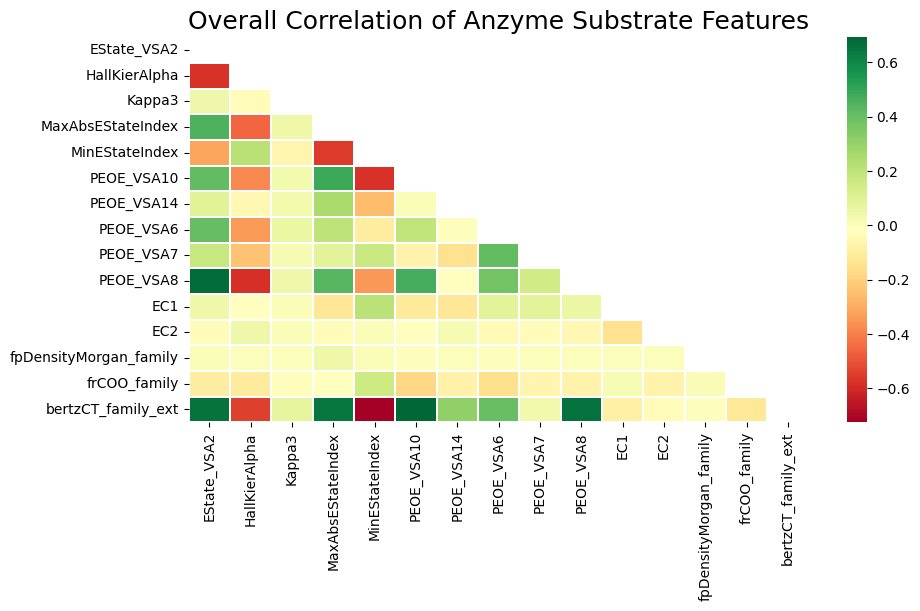

In [22]:
show_heatmap(normalized_train, 'Anzyme Substrate', 10, 5)

In [23]:
normalized_train.describe()

,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,fpDensityMorgan_family,frCOO_family,bertzCT_family_ext
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.104420,0.762833,0.068004,0.675385,0.341329,0.112853,0.036876,0.023873,0.053517,0.066812,0.667745,0.798962,0.997860,0.057340,0.118781
std,0.136605,0.109393,0.028293,0.099764,0.167626,0.142929,0.071640,0.052625,0.095365,0.108277,0.471038,0.400790,0.008209,0.083414,0.110430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000629
25%,0.000000,0.709942,0.065474,0.635063,0.135300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.997705,0.000000,0.049725
50%,0.064249,0.775439,0.066388,0.666741,0.410638,0.061864,0.012373,0.000000,0.000000,0.000000,1.000000,1.000000,0.997937,0.000000,0.081113
75%,0.128498,0.837427,0.067988,0.738295,0.449440,0.187500,0.032430,0.032317,0.065472,0.068997,1.000000,1.000000,0.998207,0.125000,0.132109
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999701,1.000000,0.736326


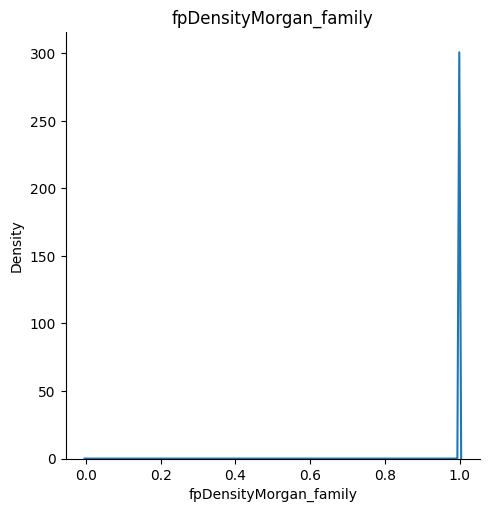

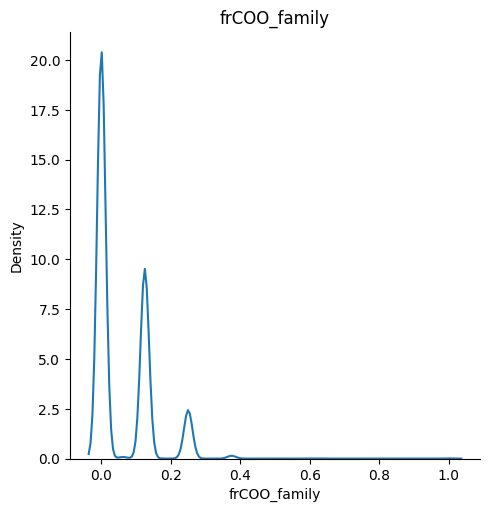

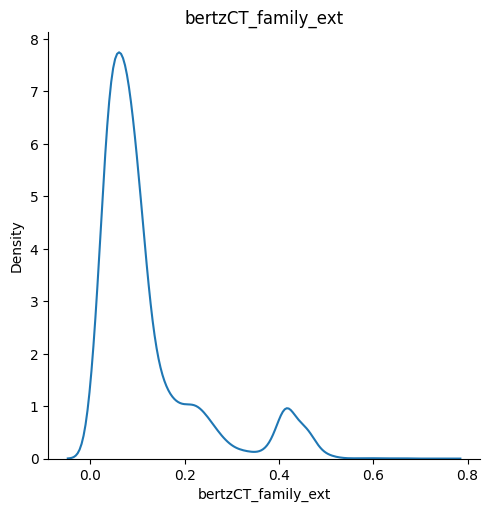

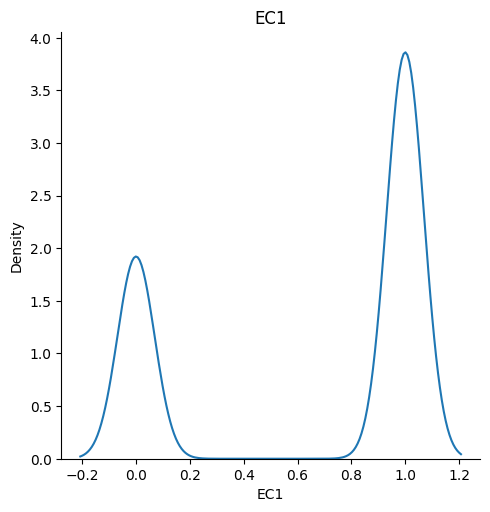

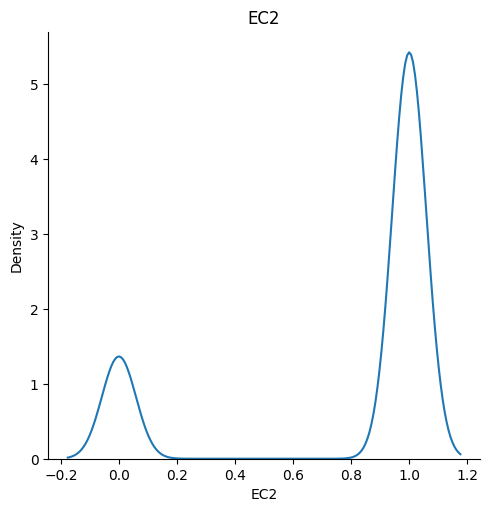

In [24]:
import seaborn as sns

sns.displot(data = normalized_train['fpDensityMorgan_family'], kind='kde').set(title='fpDensityMorgan_family')
sns.displot(data = normalized_train['frCOO_family'], kind='kde').set(title='frCOO_family')
sns.displot(data = normalized_train['bertzCT_family_ext'], kind='kde').set(title='bertzCT_family_ext')
sns.displot(data = normalized_train['EC1'], kind='kde').set(title='EC1')
sns.displot(data = normalized_train['EC2'], kind='kde').set(title='EC2')

In [25]:
# Drop "fpDensityMorgan_family" because it seems not useful

normalized_train = normalized_train.drop('fpDensityMorgan_family', axis=1)
normalized_train.describe()

,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,frCOO_family,bertzCT_family_ext
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.104420,0.762833,0.068004,0.675385,0.341329,0.112853,0.036876,0.023873,0.053517,0.066812,0.667745,0.798962,0.057340,0.118781
std,0.136605,0.109393,0.028293,0.099764,0.167626,0.142929,0.071640,0.052625,0.095365,0.108277,0.471038,0.400790,0.083414,0.110430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000629
25%,0.000000,0.709942,0.065474,0.635063,0.135300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.049725
50%,0.064249,0.775439,0.066388,0.666741,0.410638,0.061864,0.012373,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.081113
75%,0.128498,0.837427,0.067988,0.738295,0.449440,0.187500,0.032430,0.032317,0.065472,0.068997,1.000000,1.000000,0.125000,0.132109
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.736326


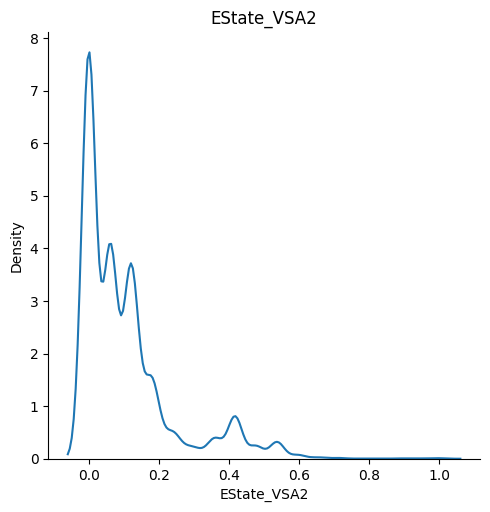

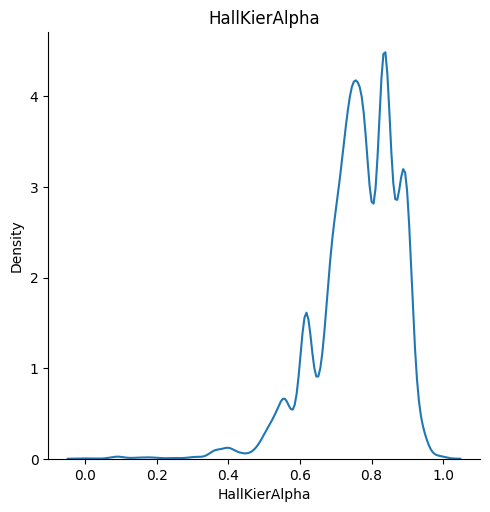

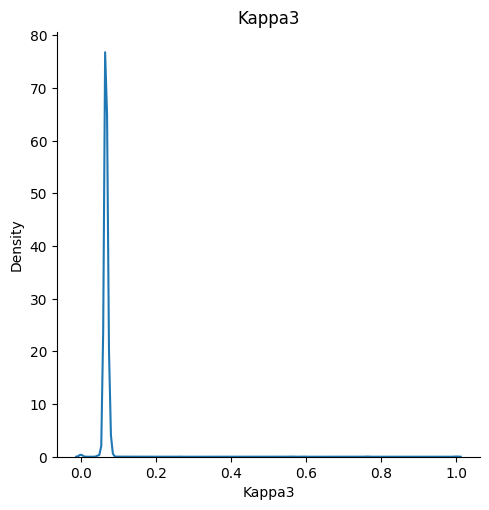

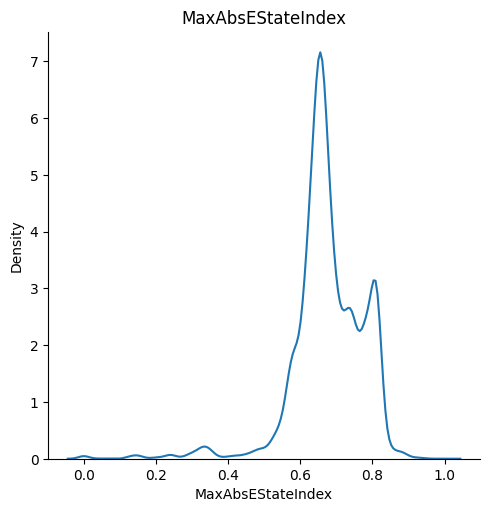

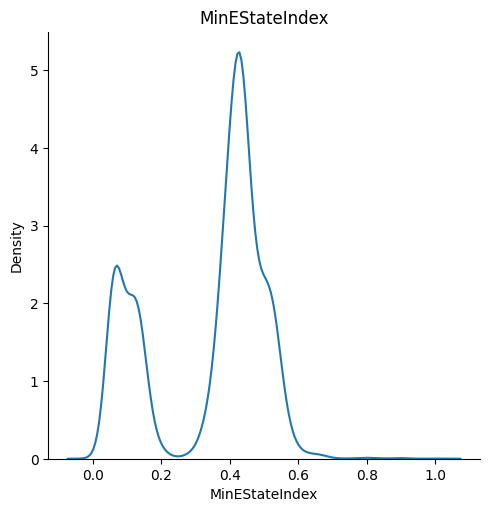

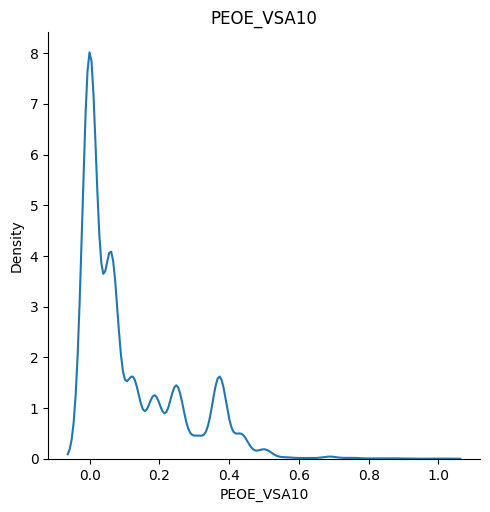

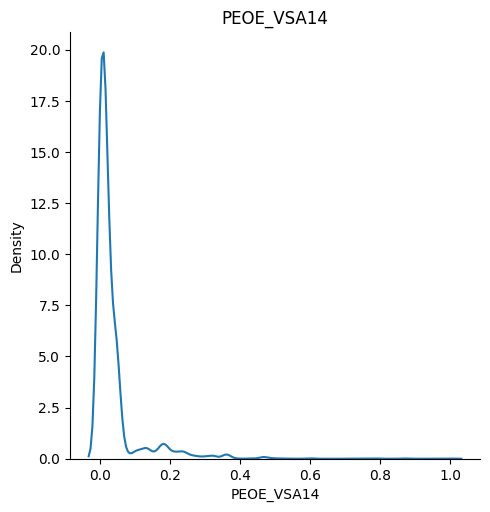

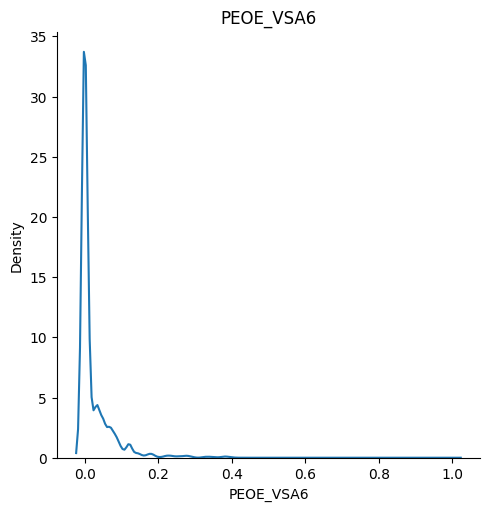

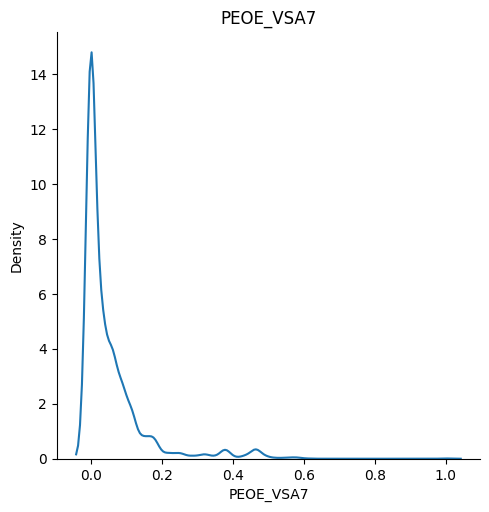

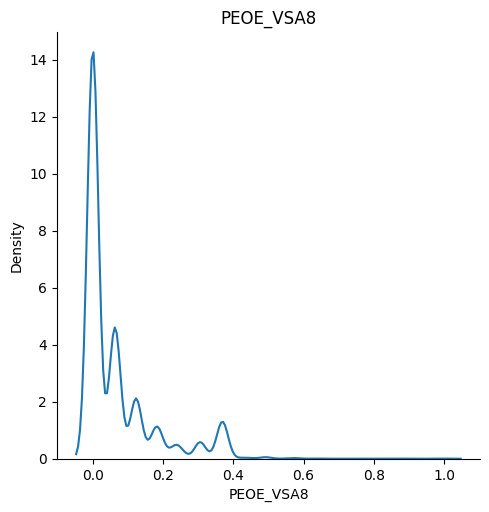

In [26]:
sns.displot(data = normalized_train['EState_VSA2'], kind='kde').set(title='EState_VSA2')
sns.displot(data = normalized_train['HallKierAlpha'], kind='kde').set(title='HallKierAlpha')
sns.displot(data = normalized_train['Kappa3'], kind='kde').set(title='Kappa3')
sns.displot(data = normalized_train['MaxAbsEStateIndex'], kind='kde').set(title='MaxAbsEStateIndex')
sns.displot(data = normalized_train['MinEStateIndex'], kind='kde').set(title='MinEStateIndex')
sns.displot(data = normalized_train['PEOE_VSA10'], kind='kde').set(title='PEOE_VSA10')
sns.displot(data = normalized_train['PEOE_VSA14'], kind='kde').set(title='PEOE_VSA14')
sns.displot(data = normalized_train['PEOE_VSA6'], kind='kde').set(title='PEOE_VSA6')
sns.displot(data = normalized_train['PEOE_VSA7'], kind='kde').set(title='PEOE_VSA7') 
sns.displot(data = normalized_train['PEOE_VSA8'], kind='kde').set(title='PEOE_VSA8')

In [27]:
normalized_train.head()

,EState_VSA2,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,frCOO_family,bertzCT_family_ext
0,0.119459,0.876023,0.069425,0.762784,0.527203,0.000000,0.189739,0.000000,0.000000,0.000000,1.0,1.0,0.00,0.074584
1,0.000000,0.893567,0.066351,0.699435,0.121441,0.250000,0.016215,0.000000,0.000000,0.000000,0.0,1.0,0.00,0.103644
2,0.066111,0.812865,0.073671,0.718993,0.102313,0.000000,0.032430,0.000000,0.252378,0.000000,1.0,1.0,0.00,0.144823
3,0.000000,0.752047,0.068530,0.714715,0.085251,0.437500,0.044224,0.000000,0.000000,0.063985,1.0,1.0,0.00,0.220802
4,0.128498,0.775439,0.066802,0.630555,0.377304,0.061864,0.024747,0.018442,0.091661,0.000000,1.0,0.0,0.25,0.075494


In [28]:
# Drop 'Kappa3' because it seems not useful
normalized_train = normalized_train.drop('Kappa3', axis=1)
normalized_train.describe() 

,EState_VSA2,HallKierAlpha,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,EC2,frCOO_family,bertzCT_family_ext
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.104420,0.762833,0.675385,0.341329,0.112853,0.036876,0.023873,0.053517,0.066812,0.667745,0.798962,0.057340,0.118781
std,0.136605,0.109393,0.099764,0.167626,0.142929,0.071640,0.052625,0.095365,0.108277,0.471038,0.400790,0.083414,0.110430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000629
25%,0.000000,0.709942,0.635063,0.135300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.049725
50%,0.064249,0.775439,0.666741,0.410638,0.061864,0.012373,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.081113
75%,0.128498,0.837427,0.738295,0.449440,0.187500,0.032430,0.032317,0.065472,0.068997,1.000000,1.000000,0.125000,0.132109
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.736326


In [29]:
column_names = ['EState_VSA2', 'HallKierAlpha', 'MaxAbsEStateIndex', 'MinEStateIndex', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'frCOO_family', 'bertzCT_family_ext']
group_names = ['EState_VSA2_group', 'HallKierAlpha_group', 'MaxAbsEStateIndex_group', 'MinEStateIndex_group', 'PEOE_VSA10_group', 'PEOE_VSA14_group', 'PEOE_VSA6_group', 'PEOE_VSA7_group', 'PEOE_VSA8_group', 'frCOO_family_group', 'bertzCT_family_ext_group']

column_group_names = dict(zip(column_names, group_names))

for column_name, group_name in column_group_names.items():

    normalized_train[group_name] = 0

    normalized_train.loc[normalized_train[column_name] < 0.1, group_name] = 0
    normalized_train.loc[(normalized_train[column_name] >= 0.1) & (normalized_train[column_name] < 0.2), group_name] = 1
    normalized_train.loc[(normalized_train[column_name] >= 0.2) & (normalized_train[column_name] < 0.3), group_name] = 2
    normalized_train.loc[(normalized_train[column_name] >= 0.3) & (normalized_train[column_name] < 0.4), group_name] = 3
    normalized_train.loc[(normalized_train[column_name] >= 0.4) & (normalized_train[column_name] < 0.5), group_name] = 4
    normalized_train.loc[(normalized_train[column_name] >= 0.5) & (normalized_train[column_name] < 0.6), group_name] = 5
    normalized_train.loc[(normalized_train[column_name] >= 0.6) & (normalized_train[column_name] < 0.7), group_name] = 6
    normalized_train.loc[(normalized_train[column_name] >= 0.7) & (normalized_train[column_name] < 0.8), group_name] = 7
    normalized_train.loc[(normalized_train[column_name] >= 0.8) & (normalized_train[column_name] < 0.9), group_name] = 8
    normalized_train.loc[(normalized_train[column_name] >= 0.9) & (normalized_train[column_name] < 1.0), group_name] = 9


normalized_train.describe()

,EState_VSA2,HallKierAlpha,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,...,HallKierAlpha_group,MaxAbsEStateIndex_group,MinEStateIndex_group,PEOE_VSA10_group,PEOE_VSA14_group,PEOE_VSA6_group,PEOE_VSA7_group,PEOE_VSA8_group,frCOO_family_group,bertzCT_family_ext_group
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.104420,0.762833,0.675385,0.341329,0.112853,0.036876,0.023873,0.053517,0.066812,0.667745,...,7.126095,6.255964,2.954778,0.800984,0.163297,0.089635,0.282383,0.438671,0.455722,0.700903
std,0.136605,0.109393,0.099764,0.167626,0.142929,0.071640,0.052625,0.095365,0.108277,0.471038,...,1.093680,1.045499,1.721466,1.260323,0.613882,0.383911,0.805505,0.926994,0.659152,1.144144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.709942,0.635063,0.135300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.064249,0.775439,0.666741,0.410638,0.061864,0.012373,0.000000,0.000000,0.000000,1.000000,...,7.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.128498,0.837427,0.738295,0.449440,0.187500,0.032430,0.032317,0.065472,0.068997,1.000000,...,8.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,6.000000,9.000000,7.000000,7.000000


In [30]:
normalized_train.head()

,EState_VSA2,HallKierAlpha,MaxAbsEStateIndex,MinEStateIndex,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,EC1,...,HallKierAlpha_group,MaxAbsEStateIndex_group,MinEStateIndex_group,PEOE_VSA10_group,PEOE_VSA14_group,PEOE_VSA6_group,PEOE_VSA7_group,PEOE_VSA8_group,frCOO_family_group,bertzCT_family_ext_group
0,0.119459,0.876023,0.762784,0.527203,0.000000,0.189739,0.000000,0.000000,0.000000,1.0,...,8,7,5,0,1,0,0,0,0,0
1,0.000000,0.893567,0.699435,0.121441,0.250000,0.016215,0.000000,0.000000,0.000000,0.0,...,8,6,1,2,0,0,0,0,0,1
2,0.066111,0.812865,0.718993,0.102313,0.000000,0.032430,0.000000,0.252378,0.000000,1.0,...,8,7,1,0,0,0,2,0,0,1
3,0.000000,0.752047,0.714715,0.085251,0.437500,0.044224,0.000000,0.000000,0.063985,1.0,...,7,7,0,4,0,0,0,0,0,2
4,0.128498,0.775439,0.630555,0.377304,0.061864,0.024747,0.018442,0.091661,0.000000,1.0,...,7,6,3,0,0,0,0,0,2,0


In [31]:
normalized_train = normalized_train.drop(column_names, axis=1)
normalized_train.head()

,EC1,EC2,EState_VSA2_group,HallKierAlpha_group,MaxAbsEStateIndex_group,MinEStateIndex_group,PEOE_VSA10_group,PEOE_VSA14_group,PEOE_VSA6_group,PEOE_VSA7_group,PEOE_VSA8_group,frCOO_family_group,bertzCT_family_ext_group
0,1.0,1.0,1,8,7,5,0,1,0,0,0,0,0
1,0.0,1.0,0,8,6,1,2,0,0,0,0,0,1
2,1.0,1.0,0,8,7,1,0,0,0,2,0,0,1
3,1.0,1.0,0,7,7,0,4,0,0,0,0,0,2
4,1.0,0.0,1,7,6,3,0,0,0,0,0,2,0


In [32]:
for idx, group_name in enumerate(group_names):
    normalized_train[f'F{idx + 1}'] = normalized_train[group_name]

normalized_train.head()

,EC1,EC2,EState_VSA2_group,HallKierAlpha_group,MaxAbsEStateIndex_group,MinEStateIndex_group,PEOE_VSA10_group,PEOE_VSA14_group,PEOE_VSA6_group,PEOE_VSA7_group,...,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,1.0,1.0,1,8,7,5,0,1,0,0,...,8,7,5,0,1,0,0,0,0,0
1,0.0,1.0,0,8,6,1,2,0,0,0,...,8,6,1,2,0,0,0,0,0,1
2,1.0,1.0,0,8,7,1,0,0,0,2,...,8,7,1,0,0,0,2,0,0,1
3,1.0,1.0,0,7,7,0,4,0,0,0,...,7,7,0,4,0,0,0,0,0,2
4,1.0,0.0,1,7,6,3,0,0,0,0,...,7,6,3,0,0,0,0,0,2,0


In [35]:
normalized_train = normalized_train.drop(group_names, axis=1)
normalized_train.describe()

,EC1,EC2,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,0.667745,0.798962,0.752864,7.126095,6.255964,2.954778,0.800984,0.163297,0.089635,0.282383,0.438671,0.455722,0.700903
std,0.471038,0.400790,1.260736,1.093680,1.045499,1.721466,1.260323,0.613882,0.383911,0.805505,0.926994,0.659152,1.144144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,7.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,7.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,8.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,6.000000,9.000000,7.000000,7.000000


In [36]:
normalized_train.head()

,EC1,EC2,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,1.0,1.0,1,8,7,5,0,1,0,0,0,0,0
1,0.0,1.0,0,8,6,1,2,0,0,0,0,0,1
2,1.0,1.0,0,8,7,1,0,0,0,2,0,0,1
3,1.0,1.0,0,7,7,0,4,0,0,0,0,0,2
4,1.0,0.0,1,7,6,3,0,0,0,0,0,2,0


In [38]:
feature_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11']

dfl = pd.DataFrame()
dfl[feature_columns] = normalized_train[feature_columns]
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11
0,1,8,7,5,0,1,0,0,0,0,0
1,0,8,6,1,2,0,0,0,0,0,1
2,0,8,7,1,0,0,0,2,0,0,1
3,0,7,7,0,4,0,0,0,0,0,2
4,1,7,6,3,0,0,0,0,0,2,0


In [39]:
#전처리 및 머신러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

In [40]:
 # 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores = {}

In [45]:
X_train = dfl
y_train_ec1 = normalized_train['EC1']
y_train_ec2 = normalized_train['EC2']

print(X_train.head())
print(y_train_ec1.head())
print(y_train_ec2.head())

   F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  F11
0   1   8   7   5   0   1   0   0   0    0    0
1   0   8   6   1   2   0   0   0   0    0    1
2   0   8   7   1   0   0   0   2   0    0    1
3   0   7   7   0   4   0   0   0   0    0    2
4   1   7   6   3   0   0   0   0   0    2    0
0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: EC1, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: EC2, dtype: float64


In [50]:
# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
import time

for ind, mod in enumerate(models):
    print(f"{model_names[ind]} training started...")
    start_time = time.time()
    
    mod.fit(X_train, y_train_ec1)
    acc = cross_val_score(mod, X_train, y_train_ec1, scoring = 'accuracy', cv = 10)
    scores[model_names[ind]] = acc
    
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"{model_names[ind]} training finished!! (Elapsed Time: {elapsed_time})")
    

Random Forest training started...
Random Forest training finished!! (Elapsed Time: 7.229701042175293)
K Nearest Neighbour training started...
K Nearest Neighbour training finished!! (Elapsed Time: 1.0120162963867188)
Logistic Regression training started...
Logistic Regression training finished!! (Elapsed Time: 0.5809319019317627)
XGBoost training started...
XGBoost training finished!! (Elapsed Time: 10.352702140808105)
Gradient Boosting training started...
Gradient Boosting training finished!! (Elapsed Time: 5.8656909465789795)
SVC training started...
SVC training finished!! (Elapsed Time: 359.79377031326294)
Extra Trees training started...
Extra Trees training finished!! (Elapsed Time: 6.93271017074585)
AdaBoost training started...
AdaBoost training finished!! (Elapsed Time: 2.391374111175537)
Gaussian Naive Bayes training started...
Gaussian Naive Bayes training finished!! (Elapsed Time: 0.06215405464172363)
Gaussian Process training started...
Gaussian Process training finished!! (E

In [51]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Gradient Boosting,0.702830,0.712938,0.702156,0.686658,0.696092,0.710243,0.704178,0.706873,0.697910,0.690492,0.701037
AdaBoost,0.703504,0.721024,0.693396,0.685984,0.691375,0.706873,0.704178,0.711590,0.696561,0.681052,0.699554
SVC,0.697439,0.725067,0.681267,0.689353,0.696765,0.706199,0.677898,0.701482,0.676332,0.683075,0.693488
XGBoost,0.699461,0.706199,0.692049,0.688679,0.682615,0.694070,0.690701,0.696765,0.692515,0.683749,0.692680
Gaussian Process,0.690701,0.698787,0.679245,0.690701,0.690027,0.695418,0.697439,0.700809,0.693189,0.681052,0.691737
Logistic Regression,0.688005,0.694744,0.683962,0.691375,0.683288,0.694744,0.687332,0.692722,0.672960,0.680378,0.686951
Gaussian Naive Bayes,0.689353,0.696092,0.678571,0.669811,0.681941,0.692722,0.688005,0.685310,0.671612,0.662846,0.681626
Random Forest,0.681941,0.692049,0.682615,0.672507,0.665768,0.693396,0.681267,0.688005,0.669589,0.672286,0.679942
Extra Trees,0.679245,0.687332,0.658356,0.665094,0.659030,0.679919,0.673181,0.688005,0.672286,0.663520,0.672597
Bagging Classifier,0.677224,0.671833,0.678571,0.665094,0.669811,0.671833,0.671159,0.671833,0.669589,0.664194,0.671114


Text(0.5, 0, 'Accuracy Score (%)')

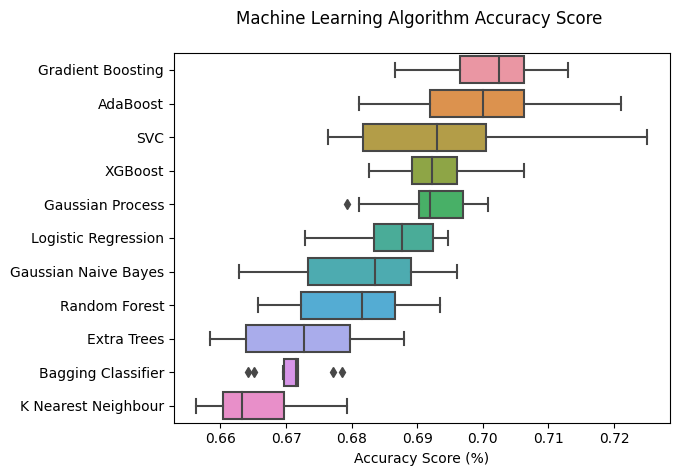

In [52]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')

In [53]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, xlabel, ylabel, title, n=20):
    sns.set(style='whitegrid')
    ax = data.tail(n).plot(kind='barh')

    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    plt.show()

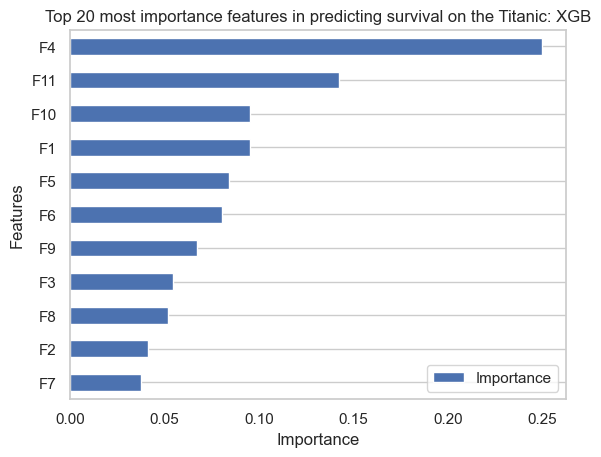

In [54]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features': dfl.columns.tolist(), 'Importance': xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

title = 'Top 20 most importance features in predicting survival on the Titanic: XGB'

importance_plotting(importance, 'Importance', 'Features', title, 20)